Average rain per 1h: 0.3342639614969712
Average traffic volume: 3259.8183553232097
Median snow on 1h:  0.0
Median traffic volume: 3380.0
Standard deviation of traffic volume:  1986.8606704463589
Standard deviation of temperature:  13.338231912676328
Minimum temperature:  -273.16 Maximum temperature:  36.90999999999997


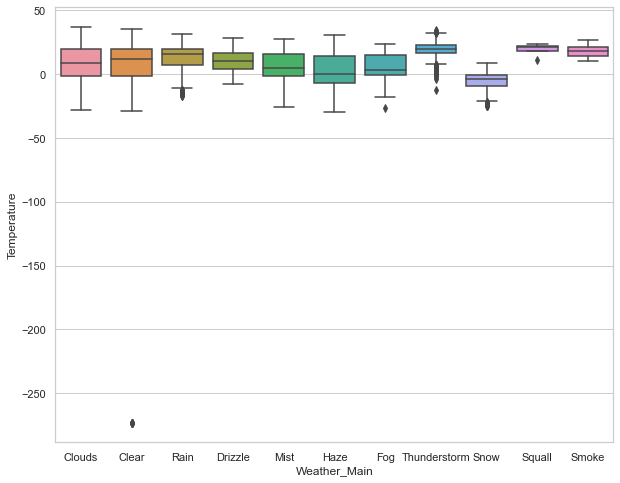

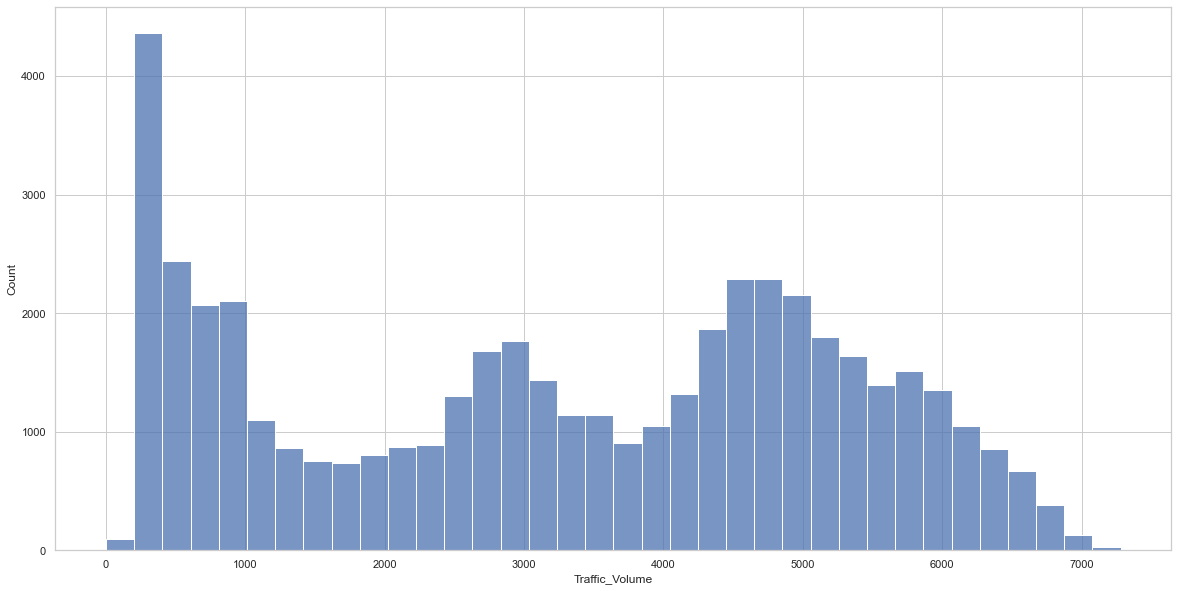

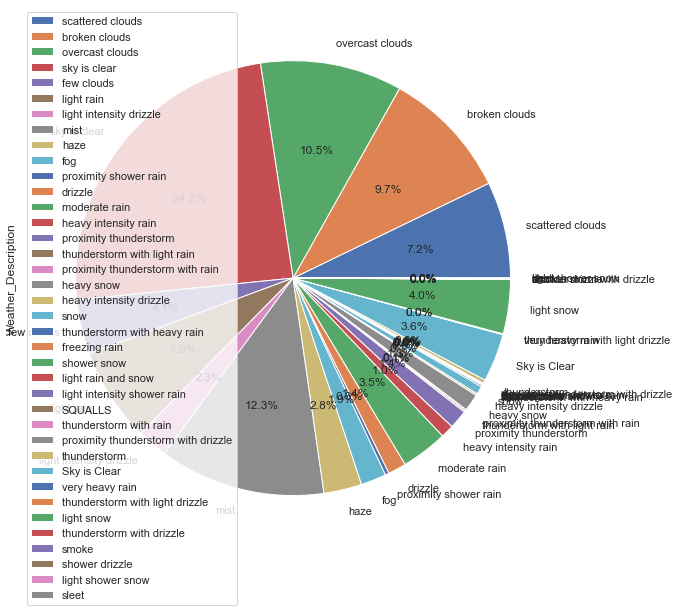

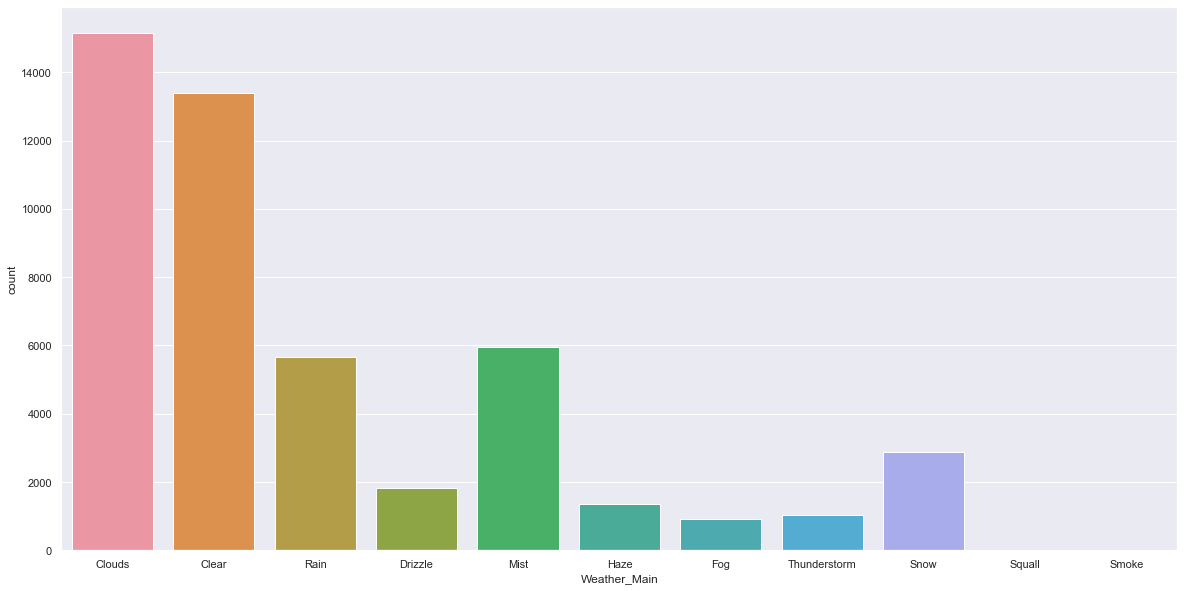

In [58]:
import pandas as pd
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#Spajanje vise skupova podataka
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")


#upis podataka u file
#data.to_csv("C:/Users/Nikola Petrovic/Desktop/ML/Data/PHASE_Data/metro.csv", index=False)

#provera da li ima missing values
#data.isna().sum()

#brisanje duplikata
#data.duplicated(subset=None, keep='first')
#data.drop_duplicates(subset=None, keep='first')

#prikaz podataka klasa
#sns.countplot(x='traffic_volume', data=data)

#sortiranje i opis podataka
#data.describe()
#data.sort_values('Phase')
#data=data['1']/data['1'].max()

#skaliranje podataka
#df2 = pd.unique(data[['holiday', 'rain_1h', 'snow_1h', 'weather_main', 'weather_description']].values.ravel())
#df2 = pd.unique(data[['holiday']].values.ravel())
#df2 = pd.unique(data[['rain_1h']].values.ravel())
df3 = pd.unique(data[['snow_1h']].values.ravel())
df2 = pd.unique(data[['weather_main']].values.ravel())
#df2 = pd.unique(data[['weather_description']].values.ravel())

data['holiday'] = data['holiday'].replace(
    ['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day',
    'New Years Day', 'Washingtons Birthday', 'Memorial Day', 'Independence Day',
    'State Fair', 'Labor Day', 'Martin Luther King Jr Day'], 
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# data['weather_main'] = data['weather_main'].replace(
#     ['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Thunderstorm',
#     'Snow', 'Squall', 'Smoke'], 
#     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# data['weather_description'] = data['weather_description'].replace(
#     ['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
#     'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze', 'fog',
#     'proximity shower rain', 'drizzle', 'moderate rain', 'heavy intensity rain',
#     'proximity thunderstorm', 'thunderstorm with light rain',
#     'proximity thunderstorm with rain', 'heavy snow', 'heavy intensity drizzle',
#     'snow', 'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
#     'light rain and snow', 'light intensity shower rain', 'SQUALLS',
#     'thunderstorm with rain', 'proximity thunderstorm with drizzle',
#     'thunderstorm', 'Sky is Clear', 'very heavy rain',
#     'thunderstorm with light drizzle', 'light snow',
#     'thunderstorm with drizzle', 'smoke', 'shower drizzle', 'light shower snow',
#     'sleet'], 
#     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37 ])

scaler = MinMaxScaler()

    #Scaling cloud data
#data[['clouds_all']] = scaler.fit_transform(data[['clouds_all']])
    #Scaling of temperature data
#data[['temp']]=scaler.fit_transform(data[['temp']])

    #Changing the names of attributes
data.rename(columns = {'holiday':'Holiday'}, inplace = True)
data.rename(columns = {'temp':'Temperature'}, inplace = True)
data.rename(columns = {'rain_1h':'Rain_1h'}, inplace = True)
data.rename(columns = {'snow_1h':'Snow_1h'}, inplace = True)
data.rename(columns = {'clouds_all':'Clouds_All'}, inplace = True)
data.rename(columns = {'weather_main':'Weather_Main'}, inplace = True)
data.rename(columns = {'weather_description':'Weather_Description'}, inplace = True)
data.rename(columns = {'date_time':'Date_Time'}, inplace = True)
data.rename(columns = {'traffic_volume':'Traffic_Volume'}, inplace = True)
#df2 = pd.unique(data[['weather_description']].values.ravel())
#print(df2)
#data["holiday"]

# df = pd.DataFrame([
#                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37 ]], 
#                    columns=['TempScaled'])
# display(df)
# df_max_scaled = df.copy()
            
# for column in df_max_scaled.columns:
#     df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
#display(df_max_scaled)



#DESCRIPTIVE ANALYTICS

    #1 Mean of rain in millimeters per one hour 

averageRain = data['Rain_1h'].mean()
print("Average rain per 1h: " + str(averageRain)) 

    #2 Mean of traffic volume 
averageTrafficVolume = data['Traffic_Volume'].mean()
print("Average traffic volume: " + str(averageTrafficVolume)) 

    #3 Median of falling snow in 1h
medianSnow = data['Snow_1h'].median()
print("Median snow on 1h: ", medianSnow)

    #4 Median of traffic volume
medianTrafficVolume = data['Traffic_Volume'].median()
print("Median traffic volume: " + str(medianTrafficVolume)) 

    #5 Standard deviation of traffic volume
standard_deviation = data['Traffic_Volume'].std()
print("Standard deviation of traffic volume: ", standard_deviation)

    #6 Standard deviation of temperature
standard_deviation = data['Temperature'].std()
print("Standard deviation of temperature: ", standard_deviation)

#data.head(3000)
#data[['clouds_all']]

    #Converting temperature from Kelvin to Celsius
data['Temperature'] = data['Temperature'].subtract(273.16)


    #Output sMinimum and Maximum Temperature
minTemp = data['Temperature'].min()
maxTemp = data['Temperature'].max()
print("Minimum temperature: ", minTemp, "Maximum temperature: ", maxTemp)

    #Representing Seaborn boxplot Temperature for each Weather_Main condition
%matplotlib inline
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot( x="Weather_Main", y="Temperature", data=data, orient="v")


filter_data = data.dropna(subset=['Traffic_Volume'])
plt.figure(figsize=(20,10))
sns.histplot(filter_data['Traffic_Volume'], kde=False)

type_counts = data['Weather_Description'].value_counts()
df2 = pd.DataFrame({'Weather_Description': type_counts}, 
                     index = ['scattered clouds', 'broken clouds', 'overcast clouds', 'sky is clear',
    'few clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze', 'fog',
    'proximity shower rain', 'drizzle', 'moderate rain', 'heavy intensity rain',
    'proximity thunderstorm', 'thunderstorm with light rain',
    'proximity thunderstorm with rain', 'heavy snow', 'heavy intensity drizzle',
    'snow', 'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
    'light rain and snow', 'light intensity shower rain', 'SQUALLS',
    'thunderstorm with rain', 'proximity thunderstorm with drizzle',
    'thunderstorm', 'Sky is Clear', 'very heavy rain',
    'thunderstorm with light drizzle', 'light snow',
    'thunderstorm with drizzle', 'smoke', 'shower drizzle', 'light shower snow',
    'sleet'])
df2.plot.pie(y='Weather_Description', figsize=(10,10), autopct='%1.1f%%')

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Weather_Main', data=data)